#Installing Data

# Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

import time
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filepath = '/content/drive/My Drive/Colab Notebooks/STOCK PRICE PRED/NSE_train.csv'
df_train = pd.read_csv(filepath)
df_train = df_train.sort_values('Date')

df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
1,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
3,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
4,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [4]:
filepath = '/content/drive/My Drive/Colab Notebooks/STOCK PRICE PRED/NSE_test.csv'
df_test = pd.read_csv(filepath)
df_test = df_test.sort_values('Date')

df_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-01,21727.750000,21834.349609,21680.849609,21741.900391,21741.900391,154000
1,2024-01-02,21751.349609,21755.599609,21555.650391,21665.800781,21665.800781,263700
2,2024-01-03,21661.099609,21677.000000,21500.349609,21517.349609,21517.349609,311900
3,2024-01-04,21605.800781,21685.650391,21564.550781,21658.599609,21658.599609,339200
4,2024-01-05,21705.750000,21749.599609,21629.199219,21710.800781,21710.800781,309300


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       991 non-null    object 
 1   Open       991 non-null    float64
 2   High       991 non-null    float64
 3   Low        991 non-null    float64
 4   Close      991 non-null    float64
 5   Adj Close  991 non-null    float64
 6   Volume     991 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 94.2+ KB


In [6]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,991.000000,991.000000,991.000000,991.000000,991.000000,9.910000e+02
mean,15822.760745,15900.697561,15716.523084,15812.712220,15812.712220,4.038158e+05
std,3121.117024,3112.728627,3130.668302,3124.026557,3124.026557,2.194238e+05
min,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,13812.775391,13932.549805,13693.399902,13845.375000,13845.375000,2.488500e+05
50%,16933.250000,17062.449219,16820.400391,16945.050781,16945.050781,3.147000e+05
75%,17974.149414,18085.950195,17881.924805,17995.674805,17995.674805,5.434000e+05
max,21737.650391,21801.449219,21678.000000,21778.699219,21778.699219,1.811000e+06


In [7]:
df_train.Date.iloc[0],df_train.Date.iloc[-1]

('2020-01-01', '2023-12-29')

In [8]:
df_train.Date.iloc[0],df_train.Date.iloc[-1]

('2020-01-01', '2023-12-29')

# EDA

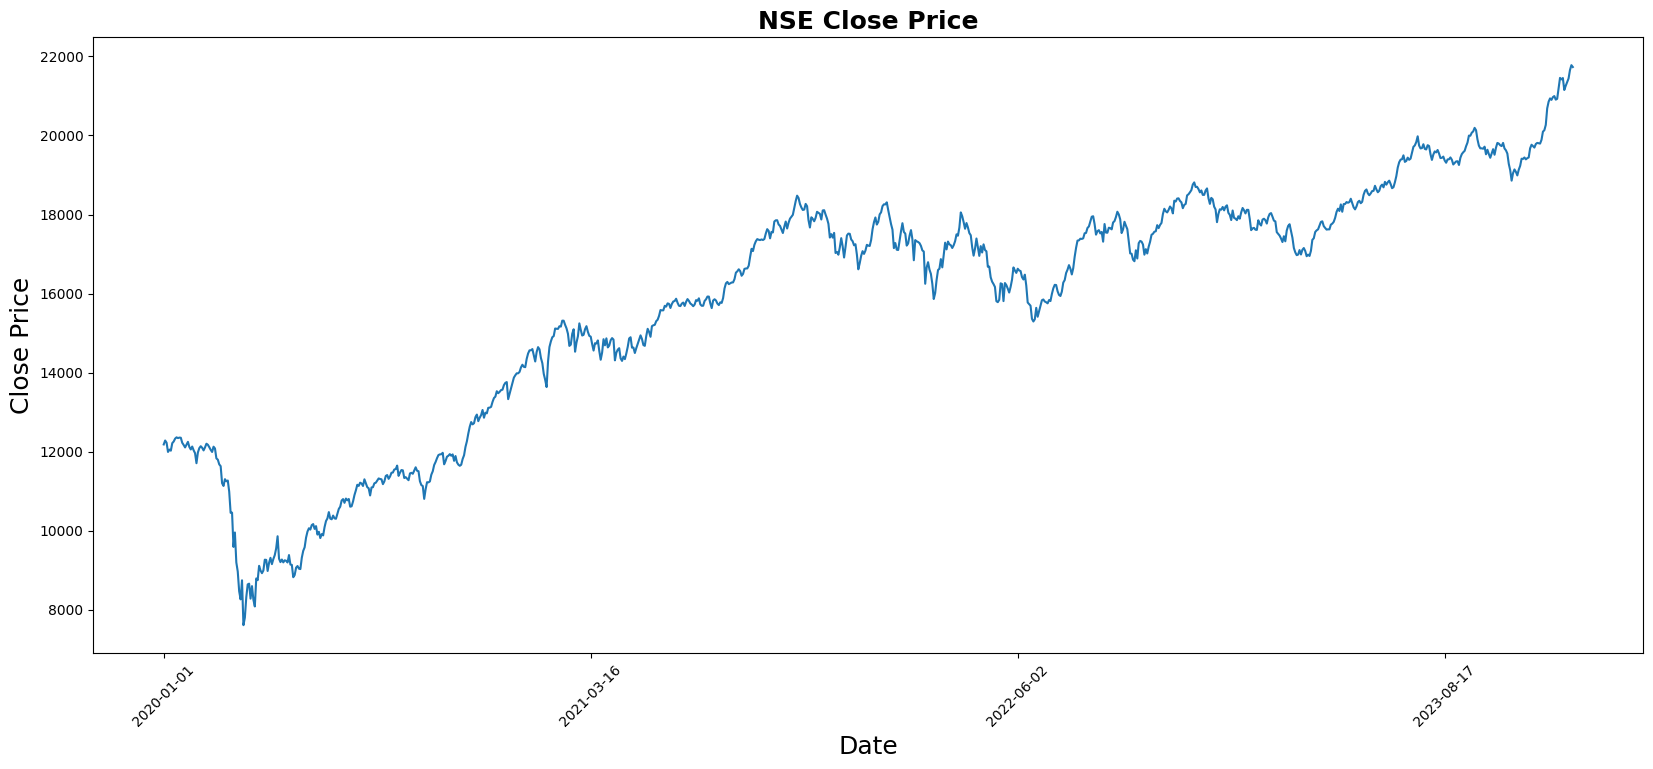

In [9]:
plt.figure(figsize = (20,8))
plt.plot(df_train[['Close']])
plt.xticks(range(0,df_train.shape[0],300),df_train['Date'].loc[::300],rotation=45)
plt.title("NSE Close Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

# Data Preprocessing

In [10]:
price_train = df_train[['Close']]

scaler = MinMaxScaler(feature_range=(-1, 1))
price_train['Close'] = scaler.fit_transform(price_train['Close'].values.reshape(-1,1))
print(price_train.head())
print(price_train.shape)

price_test = df_test[['Close']]

scaler = MinMaxScaler(feature_range=(-1, 1))
price_test['Close'] = scaler.fit_transform(price_test['Close'].values.reshape(-1,1))
# print(price_test.head())
print(price_test.shape)

      Close
0 -0.354587
1 -0.340514
2 -0.348355
3 -0.381330
4 -0.372874
(991, 1)
(51, 1)


<ipython-input-10-bc75253471e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_train['Close'] = scaler.fit_transform(price_train['Close'].values.reshape(-1,1))
<ipython-input-10-bc75253471e0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_test['Close'] = scaler.fit_transform(price_test['Close'].values.reshape(-1,1))


In [11]:
def split_data(stock_tr,stock_ts, lookback):
    data_raw_tr = stock_tr.to_numpy()
    data_tr = []
    for index in range(len(data_raw_tr) - lookback):
        data_tr.append(data_raw_tr[index: index + lookback])

    data_raw_ts = stock_ts.to_numpy()
    data_ts = []

    for index in range(len(data_raw_ts) - lookback):
        data_ts.append(data_raw_ts[index: index + lookback])

    data_tr = np.array(data_tr);
    data_ts = np.array(data_ts);

    x_train = data_tr[:,:-1,:]
    y_train = data_tr[:,-1,:]

    x_test = data_ts[:,:-1]
    y_test = data_ts[:,-1,:]

    return [x_train, y_train, x_test, y_test]

In [12]:
lookback = 7
x_train, y_train, x_test, y_test = split_data(price_train,price_test, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (984, 6, 1)
y_train.shape =  (984, 1)
x_test.shape =  (44, 6, 1)
y_test.shape =  (44, 1)


In [13]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)

x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [14]:
seed = 42
torch.manual_seed(seed)

In [30]:
input_dim = 1
output_dim = 1

hidden_dim = 256 #512

num_layers = 3 #2
num_epochs = 200 #300

# GRU model

## Building the Model

In [31]:
class StackedGRU(nn.Module):
  def __init__(self, input_dimen, hidden_dimen, num_layers, output_dimen):
    super(StackedGRU, self).__init__()
    self.hidden_dimen = hidden_dimen
    self.num_layers = num_layers
    self.gru_stack = nn.ModuleList([nn.GRU(input_dimen, hidden_dimen, batch_first=True)] +
                                       [nn.GRU(hidden_dimen, hidden_dimen, batch_first=True)
                                        for _ in range(num_layers-1)])
    # self.gru = nn.GRU(input_dimen, hidden_dimen, num_layers, batch_first=True, dropout=0.2)
    self.fc = nn.Linear(hidden_dimen, output_dimen)
    self.relu = nn.ReLU()

  def forward(self, a):
    # If input is 2D, add a batch dimension
    if a.dim() == 2:
        a = a.unsqueeze(0)
    batch_size = a.size(0)

    hiddens = []
    for i in range(self.num_layers):
      if i == 0:
        out, h = self.gru_stack[i](a)
      else:
        out, h = self.gru_stack[i](out, h)
      hiddens.append(h)
    # out = self.fc(out[:, -1, :])
    # return out
    output = self.fc(self.relu(output[:, -1,:]))
    return out

In [32]:
model = StackedGRU(input_dim, hidden_dim, num_layers, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Evaluating Training and Testing Loss

In [33]:
import time
hist_train = np.zeros(num_epochs)
hist_test = np.zeros(num_epochs)
start_time = time.time()
val_loss=[]
for t in range(num_epochs):
    y_train_pred = model(x_train)


    loss = criterion(y_train_pred, y_train_gru)

    l2_lambda = 0.001
    l2_norm = sum(p.pow(2.0).sum()
                  for p in model.parameters())

    loss = loss + l2_lambda * l2_norm

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_test_pred = model(x_test)
    loss_test = criterion(y_test_pred, y_test_gru)

    print("Epoch ", t+1, "MSE: ", loss.item(), "MSE Test: ", loss_test.item())
    hist_train[t] = loss.item()
    hist_test[t] = loss_test.item()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  1 MSE:  1.4929887056350708 MSE Test:  0.24538232386112213
Epoch  2 MSE:  1.409417748451233 MSE Test:  0.23931756615638733
Epoch  3 MSE:  1.3432193994522095 MSE Test:  0.20852795243263245
Epoch  4 MSE:  1.2645457983016968 MSE Test:  0.17345702648162842
Epoch  5 MSE:  1.1822209358215332 MSE Test:  0.14770367741584778
Epoch  6 MSE:  1.1010807752609253 MSE Test:  0.13939200341701508
Epoch  7 MSE:  1.0237900018692017 MSE Test:  0.16148614883422852
Epoch  8 MSE:  0.975658655166626 MSE Test:  0.21829932928085327
Epoch  9 MSE:  0.9738394618034363 MSE Test:  0.23466986417770386
Epoch  10 MSE:  0.9290099143981934 MSE Test:  0.19733285903930664
Epoch  11 MSE:  0.8721080422401428 MSE Test:  0.15328365564346313
Epoch  12 MSE:  0.8241483569145203 MSE Test:  0.13172389566898346
Epoch  13 MSE:  0.7916062474250793 MSE Test:  0.12737804651260376
Epoch  14 MSE:  0.7668783664703369 MSE Test:  0.12833403050899506
Epoch  15 MSE:  0.7418647408485413 MSE Test:  0.12896135449409485
Epoch  16 MSE:  0.713

## Converting Predictions and Actual Values into a Dataframe

In [34]:
actuals = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))
print(actuals.head())
preds = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
print(preds.head())

              0
0  21646.675781
1  21650.296875
2  21656.738281
3  21659.638672
4  21657.957031
              0
0  21643.394531
1  21642.164062
2  21641.439453
3  21643.304688
4  21649.072266


In [35]:
actuals_test = pd.DataFrame(scaler.inverse_transform(y_test_gru.detach().numpy()))
print(actuals_test.head())
preds_test = pd.DataFrame(scaler.inverse_transform(y_test_pred.detach().numpy()))
print(preds_test.head())

              0
0  21544.849609
1  21618.697266
2  21647.199219
3  21894.550781
4  22097.449219
              0
0  21642.416016
1  21612.630859
2  21599.691406
3  21613.177734
4  21636.632812


# Visualization

## Training Set

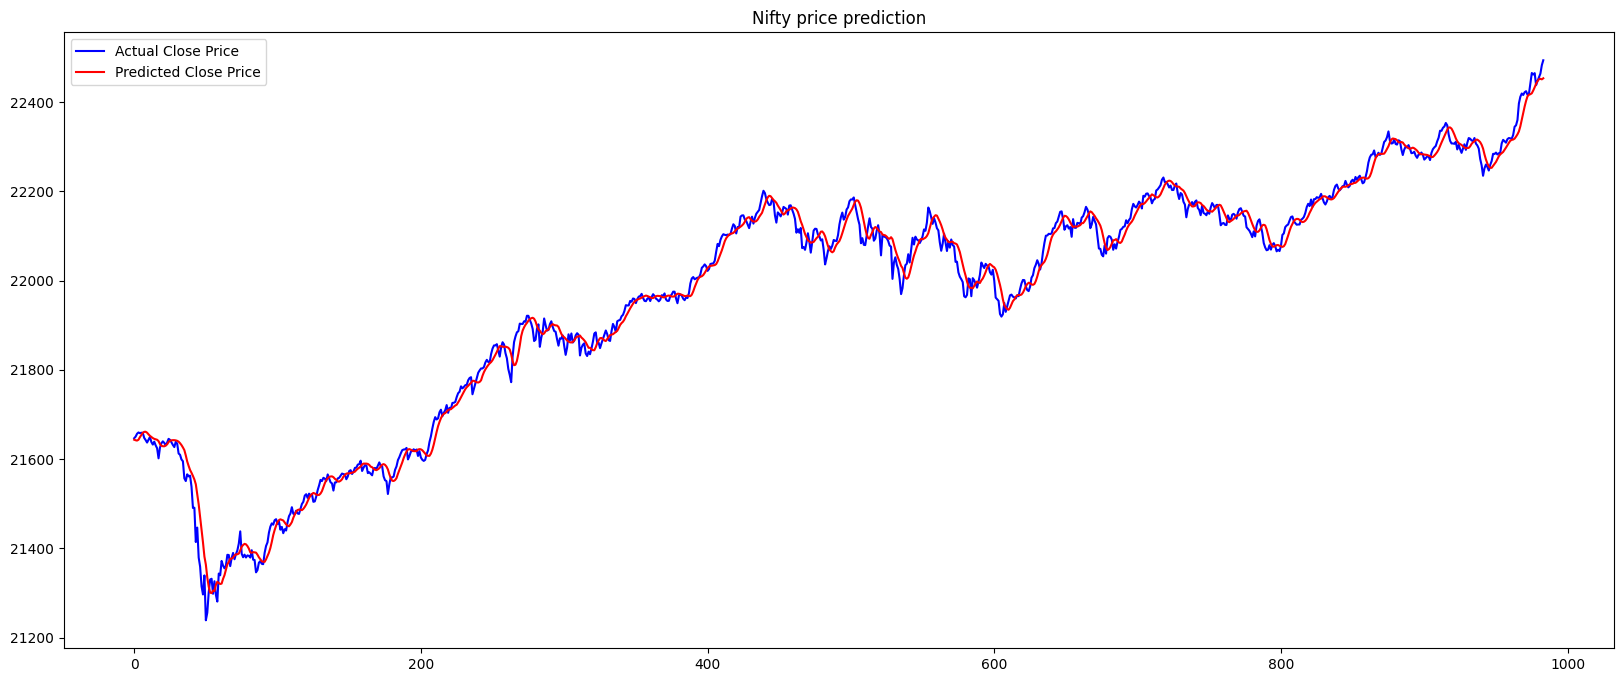

In [36]:
valid = actuals
valid['Predictions'] = preds
plt.figure(figsize=(20,8))
plt.plot(valid[0], color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'], color = 'red', label = 'Predicted Close Price')
plt.title('Nifty price prediction')
plt.legend()
plt.show()

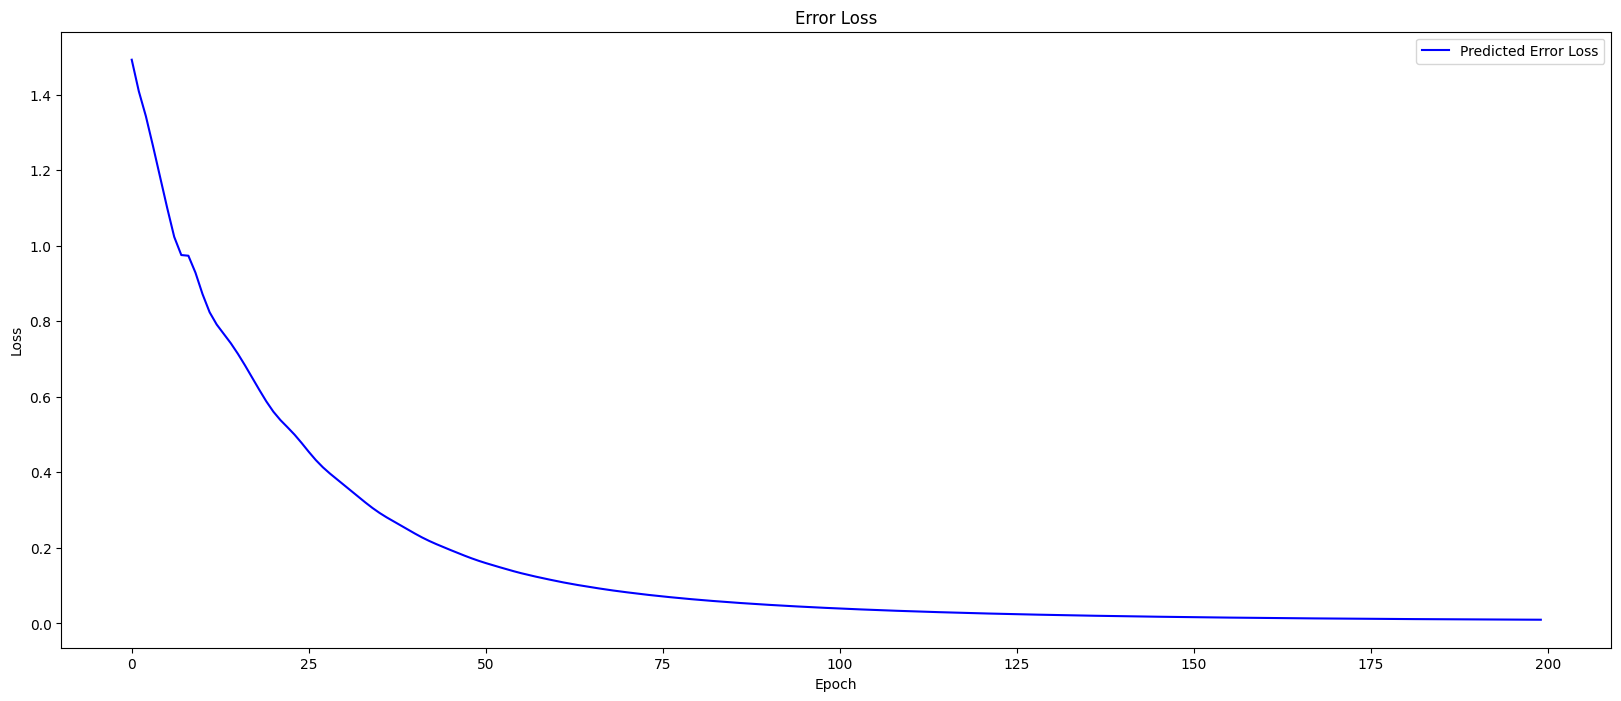

In [37]:
epochs = np.arange(num_epochs)
plt.figure(figsize=(20,8))
plt.plot(epochs, hist_train, color = 'blue', label = 'Predicted Error Loss')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing Set

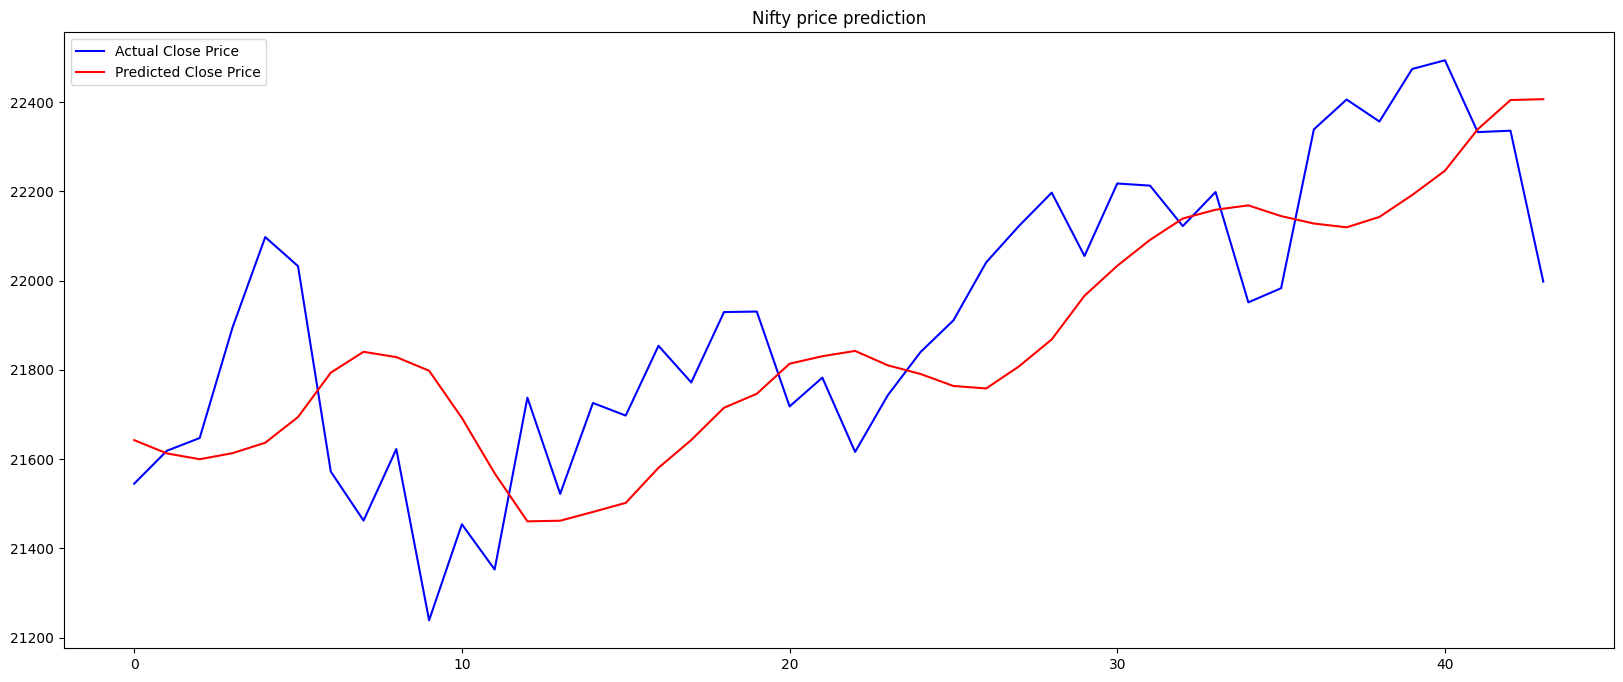

In [38]:
valid_test = actuals_test
valid_test['Predictions'] = preds_test
plt.figure(figsize=(20,8))
plt.plot(valid_test[0], color = 'blue', label = 'Actual Close Price')
plt.plot(valid_test['Predictions'], color = 'red', label = 'Predicted Close Price')
plt.title('Nifty price prediction')
plt.legend()
plt.show()

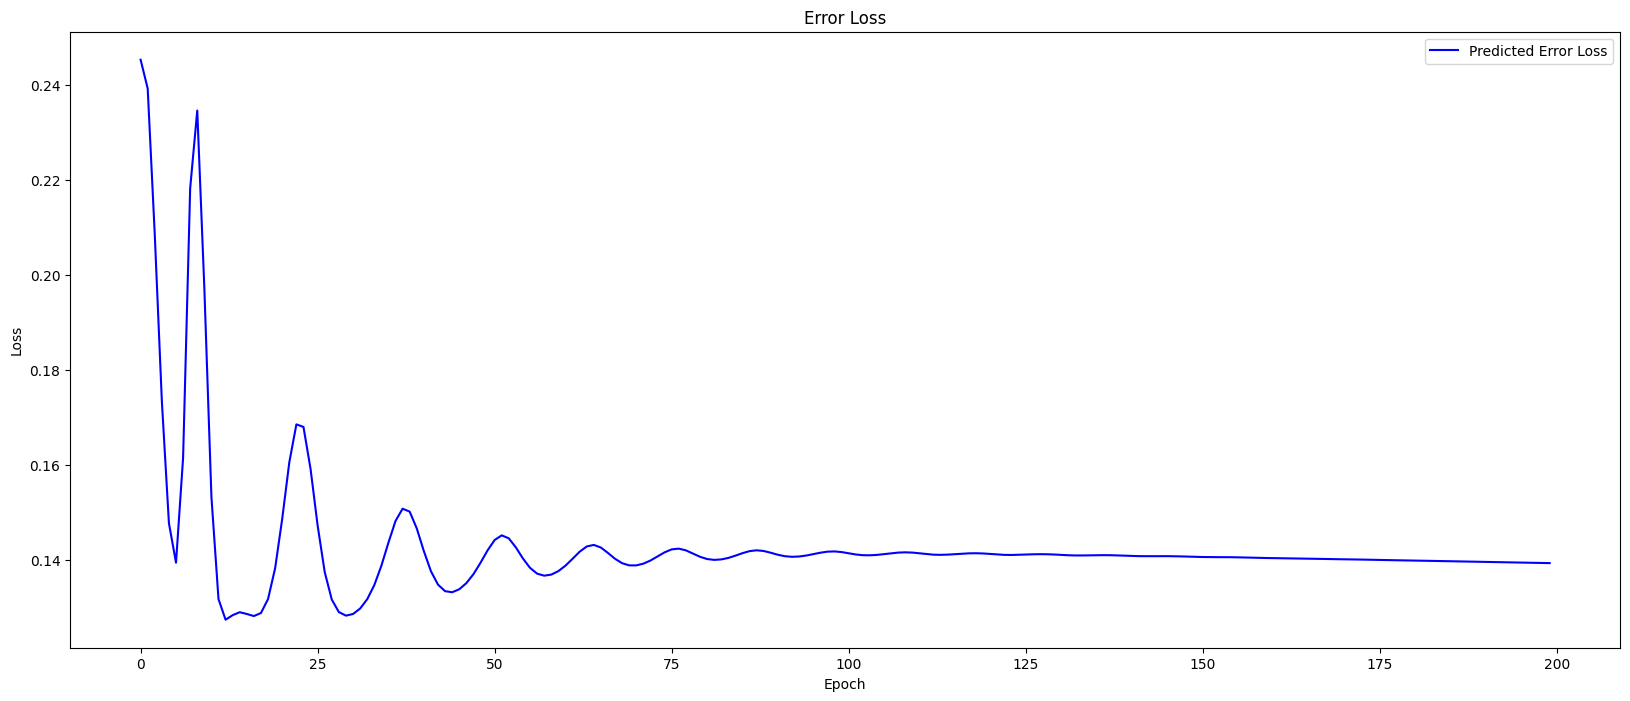

In [39]:
epochs = np.arange(num_epochs)
plt.figure(figsize=(20,8))
plt.plot(epochs, hist_test, color = 'blue', label = 'Predicted Error Loss')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# RMSE

In [40]:
import math, time
from sklearn.metrics import mean_squared_error

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())

y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

In [41]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.75 RMSE
Test Score: 234.16 RMSE
